In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [11]:
data = pd.read_csv("datasetForExp4.csv")
data = data.dropna(subset=["Global_reactive_power","Global_active_power","Voltage"],how="any")
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,NaN,17:24:00,4.216,0.418,234.84,18.400,0.000,1.000,17.0
1,NaN,17:25:00,5.360,0.436,233.63,23.000,0.000,1.000,16.0
2,NaN,17:26:00,5.374,0.498,233.29,23.000,0.000,2.000,17.0
3,NaN,17:27:00,5.388,0.502,233.74,23.000,0.000,1.000,17.0
4,NaN,17:28:00,3.666,0.528,235.68,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
10993,NaN,08:37:00,0.198,0.000,242.87,0.800,0.000,0.000,0.0
10994,NaN,08:38:00,2.042,0.000,241.76,8.800,0.000,0.000,0.0
10995,NaN,08:39:00,1.716,0.000,241.95,8.000,0.000,0.000,0.0
10996,NaN,08:40:00,0.266,0.000,243.73,1.800,0.000,0.000,0.0


In [12]:
# Using K-Means Clustering
x = data.iloc[:,3:5] # 1st for rows and second for columns
x

,Global_reactive_power,Voltage
0,0.418,234.84
1,0.436,233.63
2,0.498,233.29
3,0.502,233.74
4,0.528,235.68
...,...,...
10993,0.000,242.87
10994,0.000,241.76
10995,0.000,241.95
10996,0.000,243.73


In [13]:
kmeans = KMeans(2) # Creating three clusters
kmeans.fit(x)

KMeans(n_clusters=2)

In [14]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

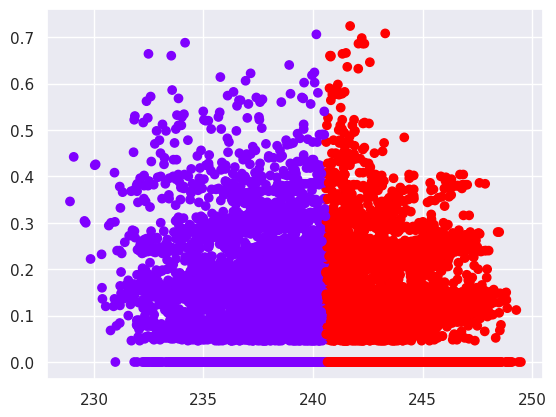

In [15]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Voltage'],data_with_clusters['Global_reactive_power'],c=data_with_clusters['Clusters'],cmap='rainbow')